In [ ]:
# This notebook provides the different analyses on the Wikidata businesses, enterprises and companies data 
# Main code marieke.van.erp@dh.huc.knaw.nl 
# Additional sections provided by Jiaqi Zhu & Vera Provatorova 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import glob 


In [ ]:
# If you've split the files, then you need the glob
files = glob.glob('data/businesses-enterprises-companies.tsv_inf*.tsv')

df = []
li = []

for filename in files:
    print(filename)
    temp_frame = pd.read_csv(filename, index_col=None, header=0, sep="\t")
    li.append(temp_frame)
    
df = pd.concat(li, axis=0, ignore_index=True)

df

In [ ]:
# Just get some stats 
df['item_qid'].nunique()

In [ ]:
null_percent = 100 - (df.isnull().sum() / df.shape[0] * 100)
print(null_percent)

In [ ]:
df.count()

In [ ]:
filled_sum = df.isnull().sum() 
print(filled_sum)

In [193]:
# Inspect the information you have for 'Google'
df.loc[df['item_qid'].isin(['Q95'])]

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time
133742,Q95,Google,P1546,motto,Q1209731,don't be evil,NaN,+00000002015-10-00T00:00:00Z,NaN
133743,Q95,Google,P1451,motto text,NaN,Don't be evil,NaN,+00000002015-10-00T00:00:00Z,NaN
133744,Q95,Google,P1451,motto text,NaN,Do the right thing,+00000002015-10-00T00:00:00Z,NaN,NaN
133745,Q95,Google,P1448,name,NaN,Google LLC,+00000002017-00-00T00:00:00Z,NaN,NaN
133746,Q95,Google,P452,industry,Q56611700,Internet industry,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
133943,Q95,Google,P1128,number of employees,NaN,53861,NaN,NaN,+00000002012-01-01T00:00:00Z
133944,Q95,Google,P1128,number of employees,NaN,53600,NaN,NaN,+00000002014-00-00T00:00:00Z
133945,Q95,Google,P1128,number of employees,NaN,190234,NaN,NaN,+00000002022-00-00T00:00:00Z
133946,Q95,Google,P1128,number of employees,NaN,182502,NaN,NaN,+00000002023-00-00T00:00:00Z


In [213]:
### Analyse mottos 
# First create a separate dataframe to make the analysis easier 
mottos_data = df.loc[df['claim_lookup'].isin(['P1546','P1451'])].drop_duplicates()
mottos_data = mottos_data.drop(columns=['targetid'])
mottos_data['occurrences'] = mottos_data.groupby('item_qid')['item_qid'].transform('size')
mottos_data

,item_qid,item_name,claim_lookup,claim_lookup_name,targetstr,start_time,end_time,point_in_time,occurrences
229,Q11980035,DUMMY-no-en-label-DUMMY,P1451,motto text,«Spre evangeliet om Jesus»,NaN,NaN,NaN,1
1003,Q29886239,Eleven James,P1451,motto text,It's Time Better Spent,NaN,NaN,NaN,1
1133,Q29950818,Dotto Trains,P1451,motto text,Dal 1962 una storia lunga più di 50 anni,NaN,NaN,NaN,1
1237,Q30281004,BANFANB,P1451,motto text,El Banco de la Fuerza Armada Nacional Bolivariana,NaN,NaN,NaN,2
1238,Q30281004,BANFANB,P1451,motto text,En marcha,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
225194,Q1139995,MV Agusta,P1451,motto text,Motorcycle Art. Since 1945,NaN,NaN,NaN,1
226011,Q1946170,Montesa,P1451,motto text,Viva Montesa,NaN,NaN,NaN,1
230364,Q853619,Bezeq The Israeli Telecommunication Corp. Ltd.,P1451,motto text,להרגיש בבית,NaN,NaN,NaN,1
233701,Q3504341,Super Écran,P1451,motto text,Le canal de films,NaN,NaN,+00000001980-00-00T00:00:00Z,1


In [214]:
#mottos_data['occurrences'].max()
mottos_data.loc[mottos_data['item_qid'].isin(['Q95'])]

,item_qid,item_name,claim_lookup,claim_lookup_name,targetstr,start_time,end_time,point_in_time,occurrences
133742,Q95,Google,P1546,motto,don't be evil,NaN,+00000002015-10-00T00:00:00Z,NaN,3
133743,Q95,Google,P1451,motto text,Don't be evil,NaN,+00000002015-10-00T00:00:00Z,NaN,3
133744,Q95,Google,P1451,motto text,Do the right thing,+00000002015-10-00T00:00:00Z,NaN,NaN,3


In [212]:
pd.set_option('display.max_rows', 100)
mottos_data.loc[mottos_data['occurrences'] > 2]

,item_qid,item_name,claim_lookup,claim_lookup_name,targetstr,start_time,end_time,point_in_time,occurrences
23983,Q106045223,Electrolux (Italy),P1451,motto text,Fatti per essere il numero uno.,NaN,NaN,NaN,3
23984,Q106045223,Electrolux (Italy),P1451,motto text,"Fatti, non parole.",NaN,NaN,NaN,3
23985,Q106045223,Electrolux (Italy),P1451,motto text,Fatti che si vedono.,NaN,NaN,NaN,3
29124,Q106993071,Open Collective,P1451,motto text,Collect money for your community,NaN,NaN,+00000002016-00-00T00:00:00Z,3
29125,Q106993071,Open Collective,P1451,motto text,"A new form of association,transparent by design",NaN,NaN,+00000002019-00-00T00:00:00Z,3
29126,Q106993071,Open Collective,P1451,motto text,Make your community sustainable,NaN,NaN,+00000002021-00-00T00:00:00Z,3
32112,Q169552,Haribo,P1451,motto text,Haribo macht Kinder froh und Erwachsene ebenso.,NaN,NaN,NaN,5
32113,Q169552,Haribo,P1451,motto text,"Kids and grown-ups love it so, the happy world...",NaN,NaN,NaN,5
32114,Q169552,Haribo,P1451,motto text,"Gyermek, felnőtt kedve jó, édes élet HARIBO",NaN,NaN,NaN,5
32115,Q169552,Haribo,P1451,motto text,"HARIBO chutná malým, stejně tak i dospělým",NaN,NaN,NaN,5


In [152]:
#### Analyse names, results are in Table 3 in the paper 
names_data = df.loc[df['claim_lookup'].isin(['P1448'])].drop_duplicates() 
names_data['occurrences'] = names_data.groupby('item_qid')['item_qid'].transform('size')
#names_data['occurrence_companies'] = mottos_data.groupby('company')['company'].transform('size')

names_data

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences
1,Q11324386,DUMMY-no-en-label-DUMMY,P1448,name,NaN,ニチエンプロダクション,NaN,NaN,NaN,1
4,Q11342325,DUMMY-no-en-label-DUMMY,P1448,name,NaN,デザインフィル ミドリカンパニー,NaN,NaN,NaN,1
11,Q11351378,DUMMY-no-en-label-DUMMY,P1448,name,NaN,ワタナベボクシングジム,NaN,NaN,NaN,1
12,Q11354256,DUMMY-no-en-label-DUMMY,P1448,name,NaN,三井埠頭株式会社,NaN,NaN,NaN,1
14,Q11360529,DUMMY-no-en-label-DUMMY,P1448,name,NaN,上飯田連絡線株式会社,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
238141,Q67803037,Nadace Tomáše Bati,P1448,name,NaN,Nadace Tomáše Bati,NaN,NaN,NaN,1
238779,Q67401215,MND Energy Trading,P1448,name,NaN,MND Energy Trading a.s.,NaN,NaN,NaN,1
238939,Q67548824,MIKES,P1448,name,NaN,MIKES s.r.o.,NaN,NaN,NaN,1
239116,Q67609694,GTS Czech,P1448,name,NaN,GTS Czech s.r.o.,NaN,NaN,NaN,1


In [153]:
#names_data['occurrences'].max()
names_data.loc[names_data['occurrences'] > 8]

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences
3504,Q7833614,TFI International,P1448,name,NaN,TFI International Inc.,+00000002016-12-23T00:00:00Z,NaN,NaN,10
3505,Q7833614,TFI International,P1448,name,NaN,TransForce Inc.,+00000002008-03-28T00:00:00Z,+00000002016-12-23T00:00:00Z,NaN,10
3506,Q7833614,TFI International,P1448,name,NaN,TransForce Income Fund,+00000002002-09-30T00:00:00Z,+00000002008-03-28T00:00:00Z,NaN,10
3507,Q7833614,TFI International,P1448,name,NaN,TransForce Inc.,+00000001999-04-23T00:00:00Z,+00000002002-09-30T00:00:00Z,NaN,10
3508,Q7833614,TFI International,P1448,name,NaN,2320-2351 Québec Inc.,+00000001985-04-30T00:00:00Z,+00000001986-10-01T00:00:00Z,NaN,10
...,...,...,...,...,...,...,...,...,...,...
203820,Q3919666,BSB Bank,P1448,name,NaN,Закрытае акцыянернае таварыства Аб’яднаны Бела...,+00000002002-10-07T00:00:00Z,+00000002003-12-23T00:00:00Z,NaN,9
203821,Q3919666,BSB Bank,P1448,name,NaN,Byelorussian - Swiss Bank UBS Bank Joint stock...,+00000002002-10-07T00:00:00Z,+00000002003-12-23T00:00:00Z,NaN,9
203822,Q3919666,BSB Bank,P1448,name,NaN,Закрытое акционерное общество Белорусско-Швейц...,NaN,NaN,NaN,9
203823,Q3919666,BSB Bank,P1448,name,NaN,Закрытае акцыянернае таварыства Беларуска-Швей...,NaN,NaN,NaN,9


In [155]:
names_data.nunique()

item_qid             48053
item_name            45577
claim_lookup             1
claim_lookup_name        1
targetid                 0
targetstr            51418
start_time            1947
end_time              1358
point_in_time           10
occurrences             12
dtype: int64

In [156]:
industries_data = df.loc[df['claim_lookup'].isin(['P452'])].drop_duplicates() 
industries_data['occurrences'] = industries_data.groupby('item_qid')['item_qid'].transform('size')
industries_data['occurrences'].max()

25

In [157]:
# Ownership/subsidiary 
# P1830 owner_of 
# P355 subsidiary

ownership_data = df.loc[df['claim_lookup'].isin(['P1830', 'P355'])].drop_duplicates() 
ownership_data['occurrences'] = ownership_data.groupby('item_qid')['item_qid'].transform('size')
ownership_data['occurrences'].max()

186

In [158]:
   # P1830 owner_of 
    # P355 subsidiary 
    # P169 ceo 
    # P1128 number_of_employees 
    # P1813 acronym 

In [159]:
ceo_data = df.loc[df['claim_lookup'].isin(['P169'])].drop_duplicates() 
ceo_data['occurrences'] = ceo_data.groupby('item_qid')['item_qid'].transform('size')
ceo_data = ceo_data[ceo_data['start_time'].notnull()]
ceo_data['occurrences'].max()

15

In [192]:
#ceo_data.loc[ceo_data['occurrences'] == 4]
google = ceo_data.loc[ceo_data['item_qid'].isin(['Q95'])]

In [161]:
ceo_data['start_time'] = ceo_data['start_time'].str.replace("\+0000000", "")
ceo_data['start_time'] = ceo_data['start_time'].str.replace("T00:00:00Z","") 
ceo_data['start_time'] = ceo_data['start_time'].str.replace("-00","-01")
ceo_data['end_time'] = ceo_data['end_time'].str.replace("\+0000000", "")
ceo_data['end_time'] = ceo_data['end_time'].str.replace("T00:00:00Z","") 
ceo_data['end_time'] = ceo_data['end_time'].str.replace("-00","-01")
ceo_data

/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/1333649691.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ceo_data['start_time'] = ceo_data['start_time'].str.replace("\+0000000", "")
/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/1333649691.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ceo_data['end_time'] = ceo_data['end_time'].str.replace("\+0000000", "")


,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences
151,Q11896259,DUMMY-no-en-label-DUMMY,P169,ceo,Q11865425,J. N. Salminen,1903-01-01,1916-01-01,NaN,1
337,Q12055715,DUMMY-no-en-label-DUMMY,P169,ceo,Q99542897,Marcela Hrdá,2009-01-01,2010-01-01,NaN,2
338,Q12055715,DUMMY-no-en-label-DUMMY,P169,ceo,Q12037813,Miroslav Dvořák,2007-01-01,2009-01-01,NaN,2
871,Q18409539,DUMMY-no-en-label-DUMMY,P169,ceo,Q4065529,Sergey Andreyev,2018-01-01,NaN,NaN,1
980,Q29560723,KBC Group,P169,ceo,Q13744598,Koenraad Debackere,2020-01-01,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
234650,Q65230934,QuizKnock,P169,ceo,Q38277087,Takushi Izawa,2019-04-19,NaN,NaN,1
235127,Q66310008,Usmani & Company (Pvt.) Ltd,P169,ceo,Q20565738,Dr. Muhammad Imran Ashraf Usmani,2018-05-01,NaN,NaN,1
236333,Q66662475,CNCMachines.com,P169,ceo,Q66663992,Curt Doherty,2014-01-01,NaN,NaN,1
236356,Q66723419,Tenton,P169,ceo,Q66723481,Miloslav Melicharek,2012-01-01,NaN,NaN,1


In [162]:
# Dates need to be converted to get the CEO information on a timeline properly 
# This piece of code and analysis was written by Vera Provatorova 
# The results from this analyses are presented in Figure 2 in the paper and described in Section 6. 
import datetime

# Filter out rows with invalid dates
def is_valid_date(date_str):
    try:
        date = pd.to_datetime(date_str).tz_localize(None)
        print(date)
        return date < pd.Timestamp.now() # we had some CEOs starting in 2100..
    except:
        print("bla", date_str)
        return False
    
def convert_to_date(date_str):
    return pd.to_datetime(date_str).date()

#google = google[google['start_time'].apply(is_valid_date)]
#google 

ceo_data = ceo_data[ceo_data['start_time'].apply(is_valid_date)]
ceo_data['start_time'] = pd.to_datetime(ceo_data['start_time'])

# Convert start time to datetime and sort by company & start time
#ceo_data['start_time'] = ceo_data['start_time'].map(convert_to_date)
ceo_data = ceo_data.sort_values(by=['item_name', 'start_time'])

# Infer end dates
ceo_data['end_time'] = ceo_data.groupby('item_qid')['start_time'].shift(-1)

# Fill NaN end dates with the current date
ceo_data['end_time'] = ceo_data['end_time'].fillna(pd.Timestamp.now().date())
ceo_data['end_time'] = pd.to_datetime(ceo_data['end_time'])

# Ensure end dates are datetime
#ceo_data['end_time'] = ceo_data['end_time'].map(convert_to_date)

1903-01-01 00:00:00
2009-01-01 00:00:00
2007-01-01 00:00:00
2018-01-01 00:00:00
2020-01-01 00:00:00
2009-01-01 00:00:00
2015-06-01 00:00:00
1992-01-01 00:00:00
2018-01-01 00:00:00
2008-01-01 00:00:00
1995-01-01 00:00:00
1994-01-01 00:00:00
2006-12-01 00:00:00
2012-01-01 00:00:00
2010-01-01 00:00:00
2015-07-30 00:00:00
2018-01-01 00:00:00
2008-08-01 00:00:00
1993-01-01 00:00:00
1991-01-01 00:00:00
1984-01-01 00:00:00
2000-01-01 00:00:00
2021-01-01 00:00:00
2013-01-01 00:00:00
2013-06-01 00:00:00
2022-07-01 00:00:00
1920-01-01 00:00:00
1922-01-01 00:00:00
1938-01-01 00:00:00
1964-12-04 00:00:00
1983-01-01 00:00:00
2000-01-01 00:00:00
2012-04-01 00:00:00
2013-01-01 00:00:00
2012-01-01 00:00:00
2015-01-01 00:00:00
2019-06-01 00:00:00
2018-10-10 00:00:00
2018-01-01 00:00:00
1991-01-01 00:00:00
1988-01-01 00:00:00
2000-01-01 00:00:00
2002-01-01 00:00:00
2009-03-01 00:00:00
2006-01-01 00:00:00
2024-05-15 00:00:00
2008-01-01 00:00:00
2021-01-01 00:00:00
2016-01-01 00:00:00
2008-01-01 00:00:00


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/708481816.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceo_data['start_time'] = pd.to_datetime(ceo_data['start_time'])
/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/708481816.py:31: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  ceo_data['end_time'] = pd.to_datetime(ceo_data['end_time'])
/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/708481816.py:31: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the

In [163]:
ceo_data

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences
17109,Q47402605,1890s holdings,P169,ceo,Q11774225,Daniel Křetínský,2003-01-01,2025-03-23,NaN,1
200355,Q2815778,2F-Spiele,P169,ceo,Q73298,Friedemann Friese,1992-01-01,2025-03-23,NaN,1
209140,Q118977660,2SLab,P169,ceo,Q125169279,Yohei Sakamoto,2022-02-22,2025-03-23,NaN,1
57167,Q3787735,3 Italy,P169,ceo,Q107435416,Vincenzo Novari,2001-01-01,2025-03-23,NaN,1
181059,Q18636339,3D Robotics,P169,ceo,Q706222,Chris Anderson,2009-01-01,2025-03-23,NaN,1
...,...,...,...,...,...,...,...,...,...,...
125059,Q933787,Škoda Transportation,P169,ceo,Q29384457,Tomáš Ignačák,2016-01-01,2018-01-01,NaN,6
125061,Q933787,Škoda Transportation,P169,ceo,Q56452421,Petr Brzezina,2018-01-01,2022-01-01,NaN,6
125063,Q933787,Škoda Transportation,P169,ceo,Q33226824,Didier Pfleger,2022-01-01,2023-01-01,NaN,6
125064,Q933787,Škoda Transportation,P169,ceo,Q95461139,Petr Novotný,2023-01-01,2025-03-23,NaN,6


In [164]:
# Find companies with the most CEO changes (highest occurrence_companies, 95th percentile)
most_ceo_changes = ceo_data[ceo_data['occurrences'] >= ceo_data['occurrences'].quantile(0.95)]

# Find companies with no CEO changes (occurrence_companies = 1)
no_ceo_changes = ceo_data[ceo_data['occurrences'] == 1]

In [165]:
most_ceo_changes

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences
37740,Q757164,Atlas Copco,P169,ceo,Q5746220,Edvard Fränckel,1873-01-01,1887-01-01,NaN,13
37739,Q757164,Atlas Copco,P169,ceo,Q5932965,Oscar Lamm,1887-01-01,1909-01-01,NaN,13
37738,Q757164,Atlas Copco,P169,ceo,Q5826515,Gunnar Jacobsson,1909-01-01,1940-01-01,NaN,13
37737,Q757164,Atlas Copco,P169,ceo,Q16650572,Walter Wehtje,1940-01-01,1957-01-01,NaN,13
37736,Q757164,Atlas Copco,P169,ceo,Q5569202,Kurt-Allan Belfrage,1957-01-01,1970-01-01,NaN,13
...,...,...,...,...,...,...,...,...,...,...
32957,Q156578,Volkswagen Group,P169,ceo,Q68648,Bernd Pischetsrieder,2002-01-01,2007-01-01,NaN,12
32958,Q156578,Volkswagen Group,P169,ceo,Q68355,Martin Winterkorn,2007-01-01,2015-09-01,NaN,12
32959,Q156578,Volkswagen Group,P169,ceo,Q1910173,Matthias Müller,2015-09-01,2018-04-01,NaN,12
32960,Q156578,Volkswagen Group,P169,ceo,Q19285388,Herbert Diess,2018-04-01,2022-09-01,NaN,12


In [166]:
first_date = most_ceo_changes['start_time'].min()
first_date
most_ceo_changes['start_time_in_days'] = most_ceo_changes['start_time'].map(lambda x: (x-first_date).days)
most_ceo_changes

/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/2159336602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_ceo_changes['start_time_in_days'] = most_ceo_changes['start_time'].map(lambda x: (x-first_date).days)


,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences,start_time_in_days
37740,Q757164,Atlas Copco,P169,ceo,Q5746220,Edvard Fränckel,1873-01-01,1887-01-01,NaN,13,3653
37739,Q757164,Atlas Copco,P169,ceo,Q5932965,Oscar Lamm,1887-01-01,1909-01-01,NaN,13,8766
37738,Q757164,Atlas Copco,P169,ceo,Q5826515,Gunnar Jacobsson,1909-01-01,1940-01-01,NaN,13,16801
37737,Q757164,Atlas Copco,P169,ceo,Q16650572,Walter Wehtje,1940-01-01,1957-01-01,NaN,13,28123
37736,Q757164,Atlas Copco,P169,ceo,Q5569202,Kurt-Allan Belfrage,1957-01-01,1970-01-01,NaN,13,34333
...,...,...,...,...,...,...,...,...,...,...,...
32957,Q156578,Volkswagen Group,P169,ceo,Q68648,Bernd Pischetsrieder,2002-01-01,2007-01-01,NaN,12,50769
32958,Q156578,Volkswagen Group,P169,ceo,Q68355,Martin Winterkorn,2007-01-01,2015-09-01,NaN,12,52595
32959,Q156578,Volkswagen Group,P169,ceo,Q1910173,Matthias Müller,2015-09-01,2018-04-01,NaN,12,55760
32960,Q156578,Volkswagen Group,P169,ceo,Q19285388,Herbert Diess,2018-04-01,2022-09-01,NaN,12,56703


In [167]:
# prepare the plot 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

def plot_gantt_chart(data,filepath=None):
    # Convert dates to days
    first_date = data['start_time'].min()
    data['start_time_in_days'] = data['start_time'].map(lambda x: (x-first_date).days)
    data['end_time_in_days'] = data['end_time'].map(lambda x: (x-first_date).days)
    
    # Generate a unique colour for each company using seaborn palette
    company_palette = sns.color_palette('husl', n_colors=len(data['item_name'].unique()))
    company_colours = {company: colour for company, colour in zip(data['item_name'].unique(), company_palette)}

    sns.set_style('darkgrid')
    # Plotting the Gantt chart
    plt.figure(figsize=(12, 8))

    for index, row in data.iterrows():
        company = row['item_name']
        start = row['start_time_in_days']
        end = row['end_time_in_days']

        # Calculate duration
        duration = end - start

        # Plotting the tenure period as a horizontal bar
        plt.barh(y=company,
                 left=start,
                 width=duration,
                 color=company_colours[company],
                 edgecolor='black',
                 linewidth=0.5,
                 alpha=0.7)

    # Beautify the plot
    ax = plt.gca() # get current axis
    max_days = data['end_time_in_days'].max()
    ax.set_xlim(0,max_days+30)
    
    xticks = np.arange(0,max_days+30,1000)
    xticklabels = [first_date+datetime.timedelta(days=int(xtick)) for xtick in xticks]
    xticklabels_clean = []
    for label in xticklabels:
        label = label.date()
        xticklabels_clean.append(label)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels_clean,rotation=90)
    
    plt.xlabel('Time')
    plt.ylabel('Company')
    plt.title('CEO Tenure')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    
    if filepath:
        plt.savefig(filepath) # Save the plot
    else:
        plt.show() # Show the plot

/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/1848203318.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['start_time_in_days'] = data['start_time'].map(lambda x: (x-first_date).days)
/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/1848203318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['end_time_in_days'] = data['end_time'].map(lambda x: (x-first_date).days)


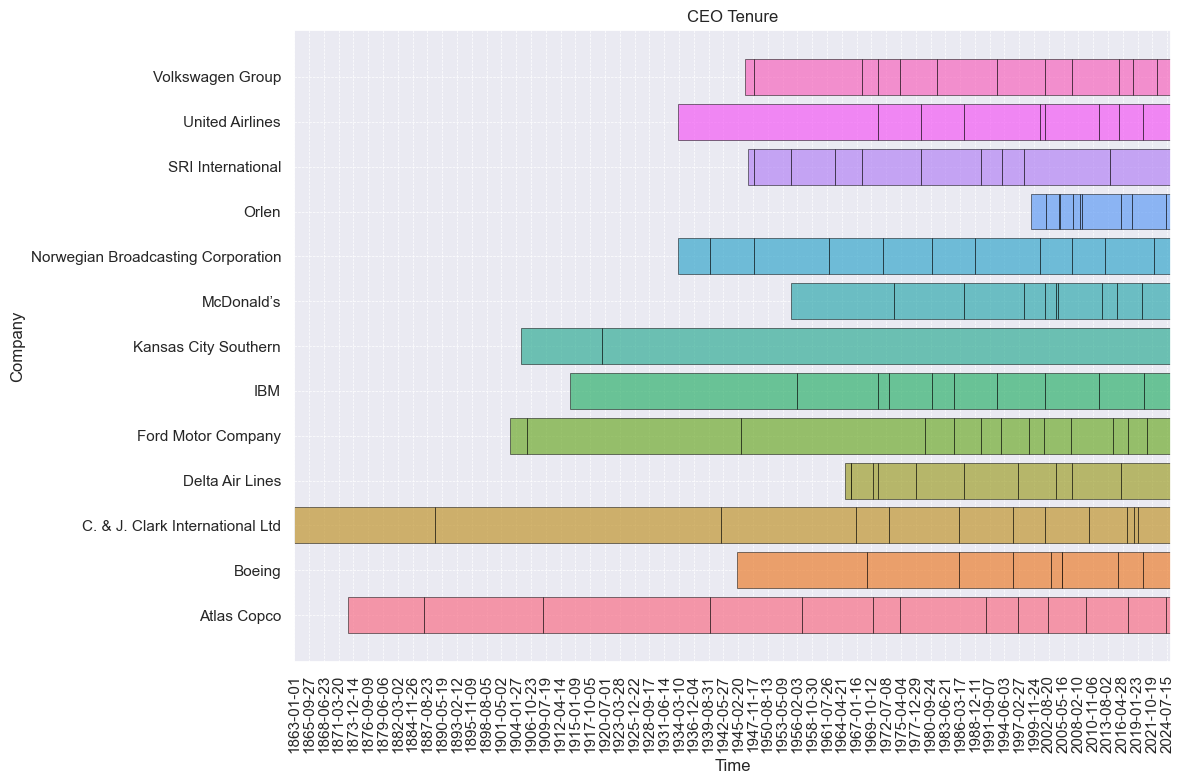

In [168]:
# Plot the  
plot_gantt_chart(most_ceo_changes)#, 'plots/ceo_change_gantt.pdf')

In [169]:
# Get some stats on the acronyms - not included in the paper 
acr_data = df.loc[df['claim_lookup'].isin(['P1813'])].drop_duplicates() 
acr_data['occurrences'] = acr_data.groupby('item_qid')['item_qid'].transform('size')
acr_data['occurrences'].max()

9

In [170]:
acr_data.nunique()

item_qid             1454
item_name            1355
claim_lookup            1
claim_lookup_name       1
targetid                0
targetstr            1624
start_time             49
end_time               36
point_in_time           0
occurrences             8
dtype: int64

In [171]:
# Analyse the number of employees over time 
# This code was written by Jiaqi Zhu
# The results are presented in Section 6 / Figure 3 in the paper 
numempl_data = df.loc[df['claim_lookup'].isin(['P1128'])].drop_duplicates() 
numempl_data['occurrences'] = numempl_data.groupby('item_qid')['item_qid'].transform('size')
numempl_data['occurrences'].max()

36

In [172]:
numempl_data.loc[numempl_data['occurrences'] > 25]

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences
30936,Q81230,Siemens,P1128,number of employees,NaN,370000,NaN,NaN,+00000002012-09-30T00:00:00Z,28
30937,Q81230,Siemens,P1128,number of employees,NaN,348000,NaN,NaN,+00000002015-09-30T00:00:00Z,28
30938,Q81230,Siemens,P1128,number of employees,NaN,357000,NaN,NaN,+00000002014-09-30T00:00:00Z,28
30939,Q81230,Siemens,P1128,number of employees,NaN,351000,NaN,NaN,+00000002016-09-30T00:00:00Z,28
30940,Q81230,Siemens,P1128,number of employees,NaN,372000,NaN,NaN,+00000002017-09-30T00:00:00Z,28
...,...,...,...,...,...,...,...,...,...,...
230522,Q552581,SAP,P1128,number of employees,NaN,29610,NaN,NaN,+00000002003-12-31T00:00:00Z,26
230523,Q552581,SAP,P1128,number of employees,NaN,28797,NaN,NaN,+00000002002-12-31T00:00:00Z,26
230524,Q552581,SAP,P1128,number of employees,NaN,28410,NaN,NaN,+00000002001-12-31T00:00:00Z,26
230525,Q552581,SAP,P1128,number of employees,NaN,24177,NaN,NaN,+00000002000-12-31T00:00:00Z,26


In [173]:
numempl_data['occurrences'].std()

5.666214642780197

In [174]:
numempl_data['occurrences'].min()

1

In [175]:
numempl_data['occurrences'].max()

36

In [176]:
numempl_data['occurrences'].mean()

3.5328645235361655

In [177]:
numempl_data['occurrences'].median()

1.0

In [178]:
# Convert datetime to date  
#numempl_data = numempl_data.assign(**numempl_data[['point_in_time']].apply(pd.to_datetime, yearfirst=True, errors='coerce'))
#numempl_data['date'] = numempl_data['point_in_time'].dt.date
# Convert numEmployees.value from string to numeric 
#numempl_data = numempl_data.assign(**numempl_data[['targetstr']].apply(pd.to_numeric, errors='coerce'))
numempl_data.head()

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences
18,Q11388277,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,223,NaN,NaN,+00000002016-03-00T00:00:00Z,2
19,Q11388277,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,254,NaN,NaN,+00000002021-03-31T00:00:00Z,2
64,Q11543311,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,150,NaN,NaN,NaN,1
98,Q11666092,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,520,NaN,NaN,NaN,1
143,Q11856368,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,100,NaN,NaN,+00000001914-01-01T00:00:00Z,1


In [179]:
# Yes this can be done in a less hacky way but it works now 
numempl_data['point_in_time'] = numempl_data['point_in_time'].str.replace("\+0000000", "")
numempl_data['point_in_time'] = numempl_data['point_in_time'].str.replace("T00:00:00Z","") 
numempl_data['point_in_time'] = numempl_data['point_in_time'].str.replace("-00","-01")
# Ensure that the point in time column is in datetime format 
numempl_data['point_in_time'] = pd.to_datetime(numempl_data['point_in_time'])
#basf['point_in_time'] = pd.to_datetime(basf['point_in_time'])


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/2865659524.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  numempl_data['point_in_time'] = numempl_data['point_in_time'].str.replace("\+0000000", "")


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 220-03-31 00:00:00 present at position 65

In [180]:
numempl_data['year'] = numempl_data['point_in_time'].str[:4].astype(float)
numempl_data

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences,year
18,Q11388277,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,223,NaN,NaN,2016-03-01,2,2016.0
19,Q11388277,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,254,NaN,NaN,2021-03-31,2,2021.0
64,Q11543311,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,150,NaN,NaN,NaN,1,NaN
98,Q11666092,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,520,NaN,NaN,NaN,1,NaN
143,Q11856368,DUMMY-no-en-label-DUMMY,P1128,number of employees,NaN,100,NaN,NaN,1914-01-01,1,1914.0
...,...,...,...,...,...,...,...,...,...,...,...
236781,Q67070269,Andersen,P1128,number of employees,NaN,1004,NaN,NaN,NaN,1,NaN
236796,Q67117895,PFNonwovens,P1128,number of employees,NaN,605,NaN,NaN,2018-12-31,2,2018.0
236797,Q67117895,PFNonwovens,P1128,number of employees,NaN,590,NaN,NaN,2017-12-31,2,2017.0
237588,Q67389109,Prosus,P1128,number of employees,NaN,21048,NaN,NaN,2024-03-31,1,2024.0


In [123]:
# Select the companies for which we have at least 25 data points 
numempl_data.loc[numempl_data['occurrences'] > 25][(['item_name','item_qid'])].drop_duplicates()

,item_name,item_qid
30900,Siemens,Q81230
31051,Bayer,Q152051
32120,Hochtief,Q136542
32510,Deutsche Post AG,Q157645
33228,Beiersdorf,Q201691
37132,EnBW,Q644304
41456,"Tesla, Inc.",Q478214
64392,HelloFresh,Q23014836
114975,GMV Innovating Solutions,Q1550912
118983,Porsche Automobil Holding SE,Q2104551


In [181]:
# Businesses with more than 25 data points 
#Siemens 	Q81230
#Bayer 	Q152051
#Hochtief 	Q136542
#Deutsche Post AG 	Q157645
#Beiersdorf 	Q201691
#EnBW 	Q644304
#Porsche Automobil Holding SE 	Q2104551
#Airbus SE 	Q2311
#Adidas AG 	Q3895
#Lufthansa 	Q9325
#Deutsche Telekom 	Q9396
#BASF 	Q9401
#Mercedes-Benz Group 	Q27530
#7-Eleven, Inc. Q17221821 

## Tesla Q478214
## HelloFresh 	Q23014836
## Salesforce 	Q941127
## Finlayson 	Q1329236
## GMV Innovating Solutions 	Q1550912
## Škoda Auto 	Q29637
## SAP 	Q552581

# companies that have more than 30 datapoints
siemens = numempl_data.loc[(numempl_data['item_qid'] == "Q81230")]
bayer = numempl_data.loc[(numempl_data['item_qid'] == "Q152051")]
hochtief = numempl_data.loc[(numempl_data['item_qid'] == "Q136542")]
deutschepost = numempl_data.loc[(numempl_data['item_qid'] == "Q157645")]
beiersdorf = numempl_data.loc[(numempl_data['item_qid'] == "Q201691")]
enbw = numempl_data.loc[(numempl_data['item_qid'] == "Q644304")]
porscheholding = numempl_data.loc[(numempl_data['item_qid'] == "Q2104551")]
airbus = numempl_data.loc[(numempl_data['item_qid'] == "Q2311")]
adidas = numempl_data.loc[(numempl_data['item_qid'] == "Q3895")]
lufthansa = numempl_data.loc[(numempl_data['item_qid'] == "Q9325")]
deutschetelecom = numempl_data.loc[(numempl_data['item_qid'] == "Q9396")]
basf = numempl_data.loc[(numempl_data['item_qid'] == "Q9401")]
mercedesbenz = numempl_data.loc[(numempl_data['item_qid'] == "Q27530")]
seveneleven = numempl_data.loc[(numempl_data['item_qid'] == "Q17221821")]
tesla = numempl_data.loc[(numempl_data['item_qid'] == "Q478214")]
hellofresh = numempl_data.loc[(numempl_data['item_qid'] == "Q23014836")]
salesforce = numempl_data.loc[(numempl_data['item_qid'] == "Q941127")]
finlayson = numempl_data.loc[(numempl_data['item_qid'] == "Q1329236")]
gmv = numempl_data.loc[(numempl_data['item_qid'] == "Q1550912")]
skoda = numempl_data.loc[(numempl_data['item_qid'] == "Q29637")]
sap = numempl_data.loc[(numempl_data['item_qid'] == "Q552581")]

In [182]:
#basf_sorted = basf.sort_values('date', ascending=True)
siemens

,item_qid,item_name,claim_lookup,claim_lookup_name,targetid,targetstr,start_time,end_time,point_in_time,occurrences,year
30936,Q81230,Siemens,P1128,number of employees,NaN,370000,NaN,NaN,2012-09-30,28,2012.0
30937,Q81230,Siemens,P1128,number of employees,NaN,348000,NaN,NaN,2015-09-30,28,2015.0
30938,Q81230,Siemens,P1128,number of employees,NaN,357000,NaN,NaN,2014-09-30,28,2014.0
30939,Q81230,Siemens,P1128,number of employees,NaN,351000,NaN,NaN,2016-09-30,28,2016.0
30940,Q81230,Siemens,P1128,number of employees,NaN,372000,NaN,NaN,2017-09-30,28,2017.0
30941,Q81230,Siemens,P1128,number of employees,NaN,293000,NaN,NaN,2020-09-30,28,2020.0
30942,Q81230,Siemens,P1128,number of employees,NaN,320000,NaN,NaN,2023-09-30,28,2023.0
30943,Q81230,Siemens,P1128,number of employees,NaN,311000,NaN,NaN,2022-09-30,28,2022.0
30944,Q81230,Siemens,P1128,number of employees,NaN,303000,NaN,NaN,2021-09-30,28,2021.0
30945,Q81230,Siemens,P1128,number of employees,NaN,385000,NaN,NaN,2019-09-30,28,2019.0


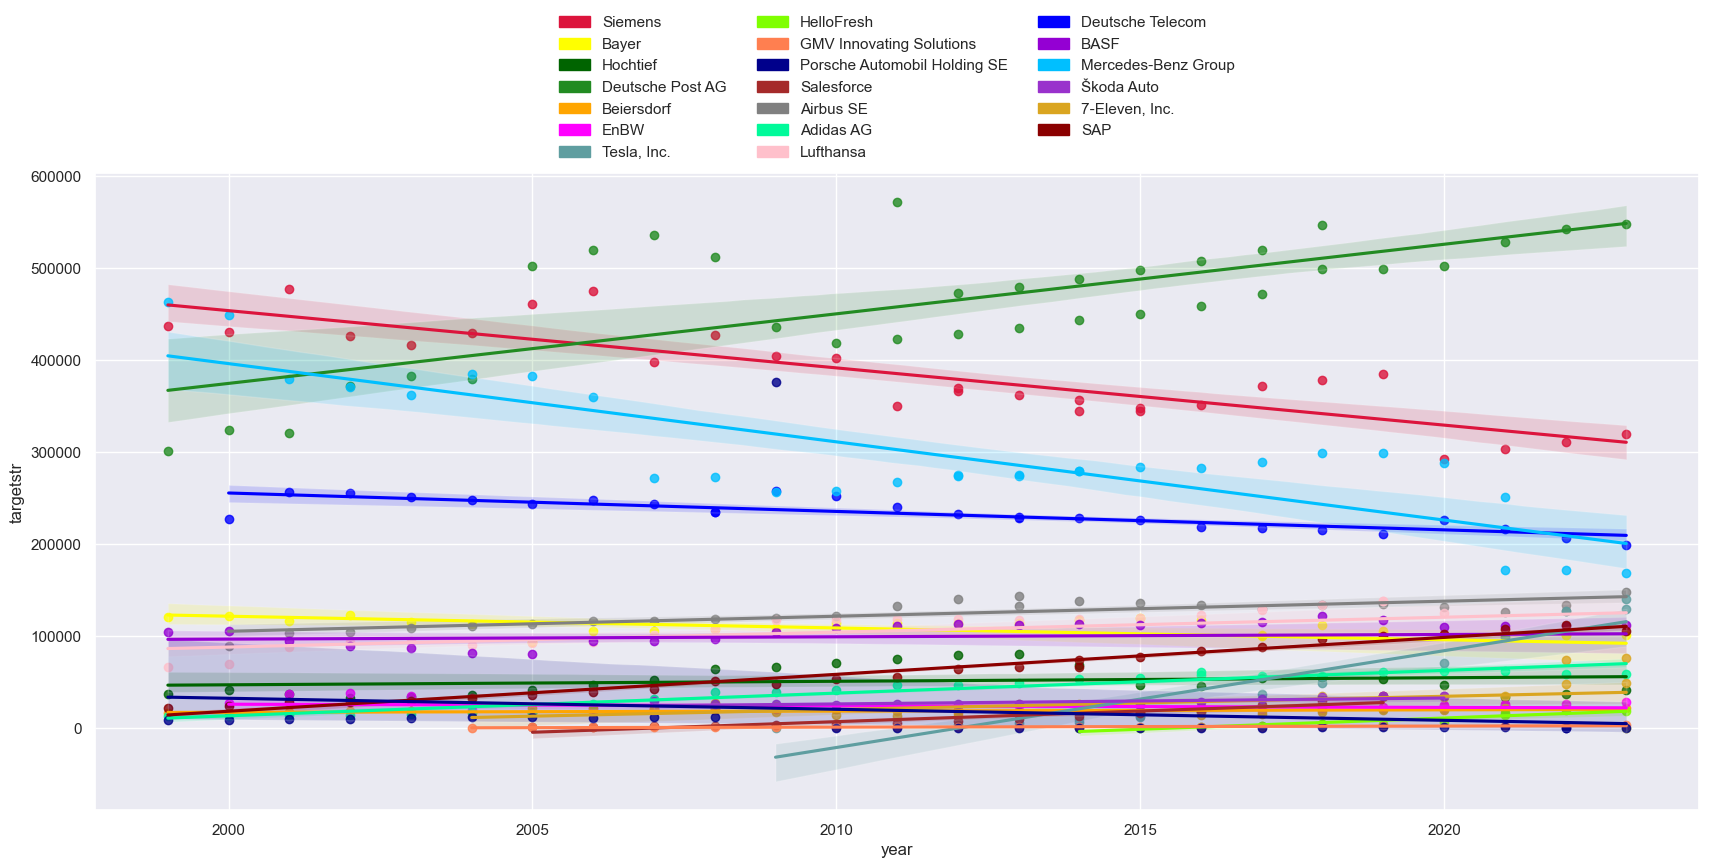

In [183]:
from datetime import date

#siemens['date_ordinal'] = pd.to_datetime(siemens['point_in_time']).apply(lambda date: date.toordinal())
#bayer['date_ordinal'] = pd.to_datetime(bayer['point_in_time']).apply(lambda date: date.toordinal())
#hochtief['date_ordinal'] = pd.to_datetime(hochtief['point_in_time']).apply(lambda date: date.toordinal())
#deutschepost['date_ordinal'] = pd.to_datetime(deutschepost['point_in_time']).apply(lambda date: date.toordinal())
#beiersdorf['date_ordinal'] = pd.to_datetime(beiersdorf['point_in_time']).apply(lambda date: date.toordinal())
#enbw['date_ordinal'] = pd.to_datetime(enbw['point_in_time']).apply(lambda date: date.toordinal())
#porscheholding['date_ordinal'] = pd.to_datetime(porscheholding['point_in_time']).apply(lambda date: date.toordinal())
#airbus['date_ordinal'] = pd.to_datetime(airbus['point_in_time']).apply(lambda date: date.toordinal())
#adidas['date_ordinal'] = pd.to_datetime(adidas['point_in_time']).apply(lambda date: date.toordinal())
#lufthansa['date_ordinal'] = pd.to_datetime(lufthansa['point_in_time']).apply(lambda date: date.toordinal())
#deutschetelecom['date_ordinal'] = pd.to_datetime(deutschetelecom['point_in_time']).apply(lambda date: date.toordinal())
#basf['date_ordinal'] = pd.to_datetime(basf['point_in_time']).apply(lambda date: date.toordinal())
#mercedesbenz['date_ordinal'] = pd.to_datetime(mercedesbenz['point_in_time']).apply(lambda date: date.toordinal())
#seveneleven['date_ordinal'] = pd.to_datetime(seveneleven['point_in_time']).apply(lambda date: date.toordinal())

sns.set(rc={'figure.figsize':(20.7,8.27)})

siemens_sorted = siemens.sort_values('year', ascending=True)

ax=sns.regplot(x = siemens_sorted['year'], y = siemens_sorted['targetstr'].astype(float), color='crimson')
sns.regplot(x = bayer['year'], y = bayer['targetstr'].astype(float), color='yellow')
sns.regplot(x = hochtief['year'], y = hochtief['targetstr'].astype(float), color='darkgreen')
sns.regplot(x = deutschepost['year'], y = deutschepost['targetstr'].astype(float), color='forestgreen')
sns.regplot(x = beiersdorf['year'], y = beiersdorf['targetstr'].astype(float), color='orange')
sns.regplot(x = enbw['year'], y = enbw['targetstr'].astype(float), color='magenta')
sns.regplot(x = airbus['year'], y = airbus['targetstr'].astype(float), color='gray')
sns.regplot(x = adidas['year'], y = adidas['targetstr'].astype(float), color='mediumspringgreen')
sns.regplot(x = lufthansa['year'], y = lufthansa['targetstr'].astype(float), color='pink')
sns.regplot(x = deutschetelecom['year'], y = deutschetelecom['targetstr'].astype(float), color='blue')
sns.regplot(x = basf['year'], y = basf['targetstr'].astype(float), color='darkviolet')
sns.regplot(x = mercedesbenz['year'], y = mercedesbenz['targetstr'].astype(float), color='deepskyblue')
sns.regplot(x = seveneleven['year'], y = seveneleven['targetstr'].astype(float), color='goldenrod')
sns.regplot(x = tesla['year'], y = tesla['targetstr'].astype(float), color='cadetblue')
sns.regplot(x = hellofresh['year'], y = hellofresh['targetstr'].astype(float), color='chartreuse')
sns.regplot(x = salesforce['year'], y = salesforce['targetstr'].astype(float), color='brown')
#sns.regplot(x = finlayson['year'], y = finlayson['targetstr'].astype(float), color='cyan')
sns.regplot(x = gmv['year'], y = gmv['targetstr'].astype(float), color='coral')
sns.regplot(x = skoda['year'], y = skoda['targetstr'].astype(float), color='darkorchid')
sns.regplot(x = sap['year'], y = sap['targetstr'].astype(float), color='darkred')
sns.regplot(x = porscheholding['year'], y = porscheholding['targetstr'].astype(float), color='darkblue')
## Tesla Q478214
## HelloFresh 	Q23014836
## Salesforce 	Q941127
## Finlayson 	Q1329236
## GMV Innovating Solutions 	Q1550912
## Škoda Auto 	Q29637
## SAP 	Q552581

tesla_patch = mpatches.Patch(color='cadetblue', label='Tesla, Inc.')
hellofresh_patch = mpatches.Patch(color='chartreuse', label='HelloFresh')
salesforce_patch = mpatches.Patch(color='brown', label='Salesforce')
gmv_patch = mpatches.Patch(color='coral', label='GMV Innovating Solutions')
skoda_patch = mpatches.Patch(color='darkorchid', label='Škoda Auto')
sap_patch = mpatches.Patch(color='darkred', label='SAP')
siemens_patch = mpatches.Patch(color='crimson', label='Siemens')
bayer_patch = mpatches.Patch(color='yellow', label='Bayer')
hochtief_patch = mpatches.Patch(color='darkgreen', label='Hochtief')
deutschepost_patch = mpatches.Patch(color='forestgreen', label='Deutsche Post AG')
beiersdorf_patch = mpatches.Patch(color='orange', label='Beiersdorf')
enbw_patch = mpatches.Patch(color='magenta', label='EnBW')
#finlayson_patch = mpatches.Patch(color='cyan', label='Finlayson')
porscheholding_patch = mpatches.Patch(color='darkblue', label='Porsche Automobil Holding SE')
airbus_patch = mpatches.Patch(color='gray', label='Airbus SE')
adidas_patch = mpatches.Patch(color='mediumspringgreen', label='Adidas AG')
lufthansa_patch = mpatches.Patch(color='pink', label='Lufthansa')
deutschetelecom_patch = mpatches.Patch(color='blue', label='Deutsche Telecom')
basf_patch = mpatches.Patch(color='darkviolet', label='BASF')
mercedesbenz_patch = mpatches.Patch(color='deepskyblue', label='Mercedes-Benz Group')
seveneleven_patch = mpatches.Patch(color='goldenrod', label='7-Eleven, Inc.') 
ax.legend(handles=[siemens_patch, bayer_patch, hochtief_patch, deutschepost_patch, beiersdorf_patch, enbw_patch, 
                   tesla_patch, hellofresh_patch, gmv_patch, porscheholding_patch, salesforce_patch,
                   airbus_patch, adidas_patch, lufthansa_patch, deutschetelecom_patch,
                  basf_patch, mercedesbenz_patch, skoda_patch, seveneleven_patch, sap_patch])

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

In [184]:
# convert dates to ordinal to compute slope

def date_to_ordinal(r):
    r['point_in_time'] = pd.to_datetime(r['point_in_time'])
    r['date_ordinal'] = r['point_in_time'].map(datetime.datetime.toordinal)
    
    return(r)

list_of_dataframes_to_convert = [basf, siemens, bayer, hochtief, deutschepost, beiersdorf, enbw, porscheholding, 
                               airbus, adidas, lufthansa, deutschetelecom, mercedesbenz, seveneleven, tesla,
                              hellofresh, gmv, salesforce, skoda, sap]

for item in list_of_dataframes_to_convert:
    item = date_to_ordinal(item)


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/3152570044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['point_in_time'] = pd.to_datetime(r['point_in_time'])
/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/3152570044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['date_ordinal'] = r['point_in_time'].map(datetime.datetime.toordinal)
/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_79708/3152570044.py:4: SettingWithCopyWarning: 
A value is trying to 

In [186]:
# Calculate slope
# Code by Jiaqi Zhu, results presented in Table 4 in the paper 
import numpy as np
from scipy import stats

def compute_slope(z):
    name = z[0]
    dataf = z[1]
    x = np.array(dataf['date_ordinal'])
    y = np.array(dataf['targetstr'].astype(float))
    #print(x,y)

    # Calculate slope using linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    slope_rounded = round(slope, 3)
    print(name + " & " + slope_rounded.astype(str) + "\\ \hline")
    
#    list_of_lines=[['basf', basf]]

list_of_lines=[['siemens', siemens], ['bayer', bayer], ['hochtief', hochtief], ['Deutsche Post', deutschepost],
               ['beiersdorf', beiersdorf], ['enBW', enbw], ['Porsche', porscheholding], ['Airbus', airbus], 
               ['Adidas', adidas], ['Lufthansa', lufthansa], ['Deutsche Telecom',deutschetelecom], ['basf',basf], 
               ['Mercedes', mercedesbenz], ['7-eleven', seveneleven], ['Tesla', tesla], ['HelloFresh', hellofresh],
               ['GMV Innovating Solutions', gmv], ['SalesForce', salesforce], ['SAP', sap], ['Škoda Auto', skoda]]

for bla in list_of_lines:
    compute_slope(bla)
#compute_slope(basf)

siemens & -17.039\ \hline
bayer & -3.502\ \hline
hochtief & 1.053\ \hline
Deutsche Post & 20.711\ \hline
beiersdorf & 0.376\ \hline
enBW & -0.468\ \hline
Porsche & -3.281\ \hline
Airbus & 4.516\ \hline
Adidas & 6.758\ \hline
Lufthansa & 4.443\ \hline
Deutsche Telecom & -5.454\ \hline
basf & 0.689\ \hline
Mercedes & -23.284\ \hline
7-eleven & 4.036\ \hline
Tesla & 29.497\ \hline
HelloFresh & 6.614\ \hline
GMV Innovating Solutions & 0.323\ \hline
SalesForce & 6.322\ \hline
SAP & 11.025\ \hline
Škoda Auto & 1.549\ \hline
